In [2]:
from pandas import read_csv 
import numpy as np

In [35]:
df = read_csv('hello.csv')
df

,head
0,550
1,450
2,550
3,550
4,450
...,...
314,1100
315,1100
316,1300
317,1300


In [36]:
values = df.values.astype('float32')
values.shape

(319, 1)

In [37]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [42]:
scaler.inverse_transform(test).ravel()

array([0.75      , 0.75      , 0.75      , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 1.25      , 0.75      ,
       1.        , 1.375     , 0.75      , 1.25      , 0.75      ,
       1.25      , 1.        , 1.25      , 1.25      , 1.375     ,
       1.375     , 1.375     , 1.375     , 1.375     , 1.375     ,
       1.375     , 1.375     , 1.375     , 1.25      , 1.        ,
       1.375     , 0.5625    , 0.75      , 0.75      , 0.5       ,
       3.875     , 1.        , 0.5       , 0.5       , 0.125     ,
       0.875     , 3.5       , 3.25      , 3.25      , 3.25      ,
       3.25      , 3.25      , 3.25      , 3.875     , 1.5       ,
       1.        , 0.6875    , 0.67499995, 0.67499995, 0.67499995,
       0.6625    , 0.6625    , 0.5625    , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.25      , 0.25      , 0.25      , 0.125  

In [21]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [22]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [23]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(183, 30, 1)

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [25]:
NUM_NEURONS_FirstLayer = 100
NUM_NEURONS_SecondLayer = 50
EPOCHS = 200
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX,trainY,epochs=EPOCHS,shuffle=True,batch_size=1, verbose=2)
 


Epoch 1/200
 - 4s - loss: 0.0167
Epoch 2/200
 - 3s - loss: 0.0109
Epoch 3/200
 - 3s - loss: 0.0091
Epoch 4/200
 - 3s - loss: 0.0090
Epoch 5/200
 - 3s - loss: 0.0089
Epoch 6/200
 - 3s - loss: 0.0079
Epoch 7/200
 - 3s - loss: 0.0088
Epoch 8/200
 - 3s - loss: 0.0083
Epoch 9/200
 - 3s - loss: 0.0077
Epoch 10/200
 - 3s - loss: 0.0070
Epoch 11/200
 - 3s - loss: 0.0069
Epoch 12/200
 - 3s - loss: 0.0073
Epoch 13/200
 - 3s - loss: 0.0067
Epoch 14/200
 - 3s - loss: 0.0071
Epoch 15/200
 - 3s - loss: 0.0073
Epoch 16/200
 - 3s - loss: 0.0071
Epoch 17/200
 - 4s - loss: 0.0070
Epoch 18/200
 - 4s - loss: 0.0071
Epoch 19/200
 - 3s - loss: 0.0066
Epoch 20/200
 - 3s - loss: 0.0066
Epoch 21/200
 - 3s - loss: 0.0059
Epoch 22/200
 - 3s - loss: 0.0066
Epoch 23/200
 - 3s - loss: 0.0060
Epoch 24/200
 - 3s - loss: 0.0061
Epoch 25/200
 - 3s - loss: 0.0058
Epoch 26/200
 - 3s - loss: 0.0057
Epoch 27/200
 - 3s - loss: 0.0057
Epoch 28/200
 - 4s - loss: 0.0060
Epoch 29/200
 - 4s - loss: 0.0061
Epoch 30/200
 - 3s - lo

In [26]:
from sklearn.externals import joblib 

# Save the model as a pickle in a file 
joblib.dump(model, 'filename.pkl')

['filename.pkl']

In [29]:
testPredict = model.predict(testX)

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((76, 1), (76,))

In [34]:
scaler.inverse_transform(testPredict).ravel()

array([ 1.4120585 ,  0.63646084,  0.46240765,  1.0430791 ,  0.55802727,
        0.8680707 ,  1.9337903 ,  0.29051548,  1.4834906 ,  0.01666085,
        0.946293  ,  0.523007  ,  1.6513759 , -0.07793461,  2.3743033 ,
        1.1196071 ,  0.06824547,  2.6748254 , -0.15262227,  1.8440837 ,
        1.0185161 ,  1.3548708 ,  0.655749  ,  0.57159454,  0.8843374 ,
        0.8556978 ,  1.0008157 ,  0.89508474,  0.8577451 ,  0.8174663 ,
        0.748533  ,  0.6799662 ,  0.56307906,  0.48803103,  0.42388034,
        0.48651385,  0.5793973 ,  0.8447561 ,  0.62054515,  0.4742965 ,
        0.6593339 ,  0.5060711 ,  0.42352554,  0.36417824,  0.61335874,
        0.27507994,  0.3198377 ,  0.27167556,  0.29904762,  0.3860441 ,
        0.4110391 ,  0.5923329 ,  0.39667666,  0.50431347,  0.5498096 ,
        0.8228385 ,  0.6240379 ,  0.73841363,  0.7158811 ,  0.7996583 ,
        0.75597906,  0.7910173 ,  0.81963426,  0.8007155 ,  0.79666966,
        0.983028  ,  0.57084805,  0.9110562 ,  0.90784085,  0.76

In [32]:
from matplotlib import pyplot as plt

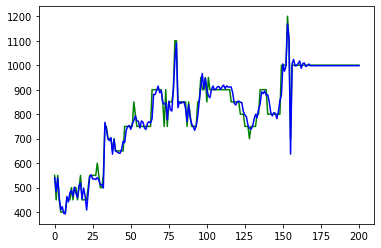

In [22]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

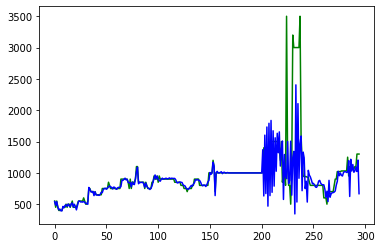

In [23]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()

In [166]:
testX.shape

(76, 30, 1)

In [28]:
testY[0]

0.75

In [33]:
testPredict = model.predict([[testX[0]]])

In [34]:
testPredict

array([[1.211219]], dtype=float32)

In [75]:
testX[93].shape

(12, 1)

In [102]:
import numpy as np
testx=np.append(testX[93][1:], [[0.75]],axis = 0) 
testx

array([[1.0625    ],
       [0.6875    ],
       [0.875     ],
       [0.8125    ],
       [0.8125    ],
       [0.82499993],
       [0.82499993],
       [0.875     ],
       [0.875     ],
       [1.125     ],
       [1.125     ],
       [0.75      ]])

In [16]:
print(testx)

NameError: name 'testx' is not defined

In [103]:
testPredict = model.predict([[testx]])
testPredict = scaler.inverse_transform(testPredict).ravel()

In [19]:
testX

array([[[0.75     ],
        [0.75     ],
        [0.75     ],
        ...,
        [1.375    ],
        [1.25     ],
        [1.       ]],

       [[0.75     ],
        [0.75     ],
        [0.75     ],
        ...,
        [1.25     ],
        [1.       ],
        [1.375    ]],

       [[0.75     ],
        [0.75     ],
        [0.75     ],
        ...,
        [1.       ],
        [1.375    ],
        [0.5625   ]],

       ...,

       [[0.25     ],
        [0.125    ],
        [0.375    ],
        ...,
        [0.8249999],
        [0.875    ],
        [0.875    ]],

       [[0.125    ],
        [0.375    ],
        [0.375    ],
        ...,
        [0.875    ],
        [0.875    ],
        [1.125    ]],

       [[0.375    ],
        [0.375    ],
        [0.375    ],
        ...,
        [0.875    ],
        [1.125    ],
        [1.125    ]]], dtype=float32)

In [14]:
import numpy as np
start=testX[75]
testPredict=[[0.75]]
for i in range(10):
    start=np.append(start[1:], testPredict,axis = 0) 
    testPredict = model.predict([[start]])
testPredict = scaler.inverse_transform(testPredict).ravel()
testPredict

array([0.74792004], dtype=float32)

In [15]:
testPredict

array([0.74792004], dtype=float32)